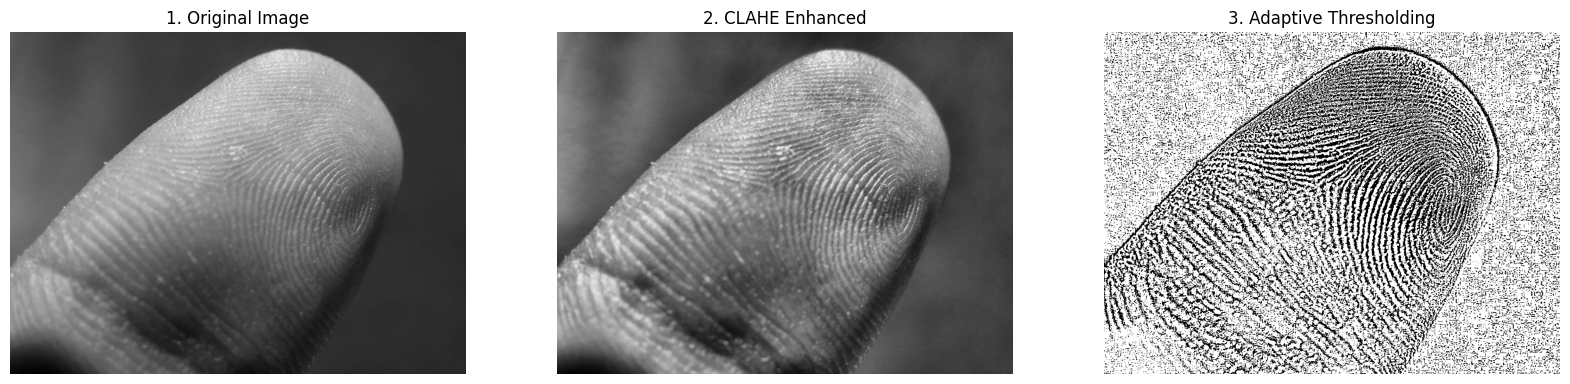

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_clahe(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced_image = clahe.apply(gray)
    
    return gray, enhanced_image

def adaptive_threshold(image):
    return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                 cv2.THRESH_BINARY, 11, 2)

def edge_detection(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    edges = cv2.magnitude(sobelx, sobely)
    return np.uint8(edges)

def gabor_filter(image, theta):
    kernel = cv2.getGaborKernel((31, 31), 4.0, theta, 10.0, 0, 0, ktype=cv2.CV_32F)
    return cv2.filter2D(image, cv2.CV_8UC3, kernel)

# Load the image
image_path = '2927418551_f442e6b0f5_b.jpg' 
image = cv2.imread(image_path)

# Apply processing steps
gray, enhanced_image = apply_clahe(image)
binary_image = adaptive_threshold(enhanced_image)
edges = edge_detection(binary_image)

theta_values = [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2, 5*np.pi/8, 3*np.pi/4, 7*np.pi/8]
gabor_images = [gabor_filter(edges, theta) for theta in theta_values]

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].imshow(gray, cmap='gray')
axes[0].set_title("1. Original Image")
axes[0].axis("off")

axes[1].imshow(enhanced_image, cmap='gray')
axes[1].set_title("2. CLAHE Enhanced")
axes[1].axis("off")

axes[2].imshow(binary_image, cmap='gray')
axes[2].set_title("3. Adaptive Thresholding")
axes[2].axis("off")


plt.show()
